---

# Ensemble Methods

---
# Introduction

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model. This file will explore two types of ensemble methods: **bagging** and **random forests**. This [video](https://www.youtube.com/watch?v=iOucwX7Z1HU&t=203s) is an real life example of trained machine learning model using Ensemble Methods and notice the average of their predictions is a much more accurate prediction that the individual predictions. 

---

## Bagging

Bagging referes to **b**ootstrap **agg**regating. **Bootstrapping** is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. In the context of machine learning, a given set of machine learning model is trained respectively on random samples of training data with replacement, then the combined predictions of each model is **aggregated** and used as a single prediction. For regression tasks this would mean taking the **average** of the set of model prediction, and for classification taking the **majority vote**. Generally speaking, the models we pick for ensembling will be "dumb learners", meaning models that are barely superior to randomly guessing. Individually the models will perform poorly, but collectively will perform well. 

---

### Algorithm - Bagging

1. Randomly sample a subset of the training data with replacement - bootstrap sample.
2. Train a model on the subset of the training data - base model.
3. Repeat steps 1 and 2 for a given number of iterations.
4. Aggregate the predictions of all the base models.

Let's assume we have a training dataset $D$ with $N$ instances. We create $M$ base models, each trained on a different subset of $D$, denoted as $D_1$, $D_2$, ..., $D_m$. Each subset $D_i$ is created by sampling $N$ instances from $D$ with replacement. 

Suppose we have a base model $f_i(x)$ for each $i \in \{1, 2, ..., M\}$, where $x$ is the input feature vector. The bagging ensemble model $F(x)$ averages the predictions from all the base models:

$$
F(x) = \frac{1}{M} \sum_{i=1}^{M} f_i(x)
$$

For classification problems, we can use majority voting to determine the final class:

$$
F(x) = \operatorname{argmax}_{c} \sum_{i=1}^{M} I(f_i(x) = c)
$$

where $I(\cdot)$ is the indicator function, which returns 1 if the condition inside the parentheses is true, and 0 otherwise. The $\operatorname{argmax}(c)$ function returns the class $c$ with the highest sum of indicator functions.

The main idea behind bagging is that by combining the predictions from multiple base models, the ensemble model reduces variance in comparison to a single base model. The base models are diverse due to the different subsets of data they are trained on, which leads to a more accurate and robust ensemble model.

**Reasoning**

When base models have low correlations with each other, bagging effectively reduces variance. Since base models are trained on different bootstrap samples, they capture different aspects of the data, making their errors less correlated. As a result, the variance of the ensemble model is reduced. 

$$
\text{Var}(F(x)) = \frac{1}{M^2} \sum_{i=1}^{M} \text{Var}(f_i(x)) + \frac{1}{M^2} \sum_{i \neq j} \text{Cov}(f_i(x), f_j(x))
$$

As $M$ increases, the variance of the ensemble model tends to decrease, assuming the covariance between base models is not too high.

But, bagging does not always reduce bias. When base models have high bias, the ensemble's bias might remain high, as averaging high-bias models would still result in a high-bias model.

---

### Illustration - Bagging

Below is the illustration of bagging algorithom. By resampling the training data with replacement, we can create different subsets of the training data. Each subset is used to train a base model. The predictions of each base model are then aggregated to form the final prediction.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" width="500">

---

### Advantages and Disadvantages - Bagging

**Advantages**

- Bagging can reduce the variance of a model, which leads to a more accurate and robust model.
- Bagging is a simple and effective method for combining the predictions from multiple base models.

**Disadvantages**

- Bagging does not reduce the bias of a model, so it is not effective for reducing the error of a high bias model.
- Bagging can be computationally expensive, especially when training a large number of base models.

---

## Implementation - Bagging




In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Set theme for plotting
sns.set_theme()
#apply bagging with decision tree as base estimator
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Load an interesting dataset to showcase ensemble methods with decision trees
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
#consider class as target variable
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=20, random_state=42)

n = X_train.shape[0]

# Create a bagging classifier
bag_clf = BaggingClassifier(estimator=clf, n_estimators=800, max_samples=n, bootstrap= True, n_jobs=-1, random_state=42)

# Fit the bagging classifier to the training data
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   random_state=42),
                  max_samples=460, n_estimators=800, n_jobs=-1,
                  random_state=42)

Accuracy of bagging classifier: 0.7792


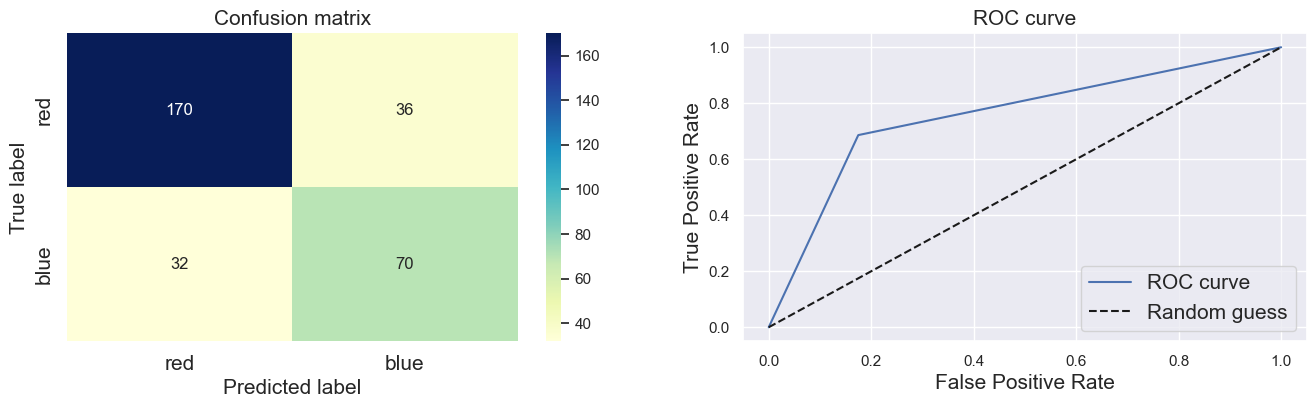

              precision    recall  f1-score   support

         red       0.84      0.83      0.83       206
        blue       0.66      0.69      0.67       102

    accuracy                           0.78       308
   macro avg       0.75      0.76      0.75       308
weighted avg       0.78      0.78      0.78       308



In [43]:
#predict result on test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy score of bag_clf with 4 decimal places
from sklearn.metrics import accuracy_score
print("Accuracy of bagging classifier: {:.4f}".format(accuracy_score(y_test, y_pred)))


#plot two graphs in one row
fig,ax = plt.subplots(1, 2, figsize=(16, 4))


#plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", ax = ax[0])
ax[0].set_xlabel("Predicted label", fontsize = 15)
ax[0].set_ylabel("True label", fontsize = 15)
ax[0].set_title("Confusion matrix", fontsize = 15)
ax[0].set_xticklabels(["red", "blue"], fontsize = 15)
ax[0].set_yticklabels(["red", "blue"], fontsize = 15)


#plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
ax[1].plot(fpr, tpr, label = "ROC curve")
ax[1].plot([0, 1], [0, 1], 'k--', label = "Random guess")
ax[1].set_xlabel("False Positive Rate", fontsize = 15)
ax[1].set_ylabel("True Positive Rate", fontsize = 15)
ax[1].set_title("ROC curve", fontsize = 15)
ax[1].legend(loc = "lower right", fontsize = 15)
plt.show()


#plot classification report
print(metrics.classification_report(y_test, y_pred, target_names = ["red", "blue"]))



----

## Random Forests 

Random forests are a specific type of bagging technique that exclusively use **decision trees as base models**.
Like bagging, random forests also train each decision tree on a different bootstrapped sample of the original training dataset.
The key difference between random forests and bagging lies in the feature selection during training. In random forests, at each node of the decision tree, only a **random subset of features** is considered for making a split. This introduces additional diversity among the trees, making the random forest more robust against overfitting.
Like bagging, random forests also reduce the variance of the model by averaging the predictions of multiple decision trees.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Random_forest_explain.png" width="500">

Random forests tend to be better than other ensemble methods like bagging with decision trees due to their ability to reduce both bias and variance in the predictions. This is achieved through the introduction of additional randomness in the construction of the individual trees. The key factors that make random forests better include:

1. **Random feature selection:** In random forests, at each node of a decision tree, only a random subset of features is considered for making a split. This random feature selection introduces more diversity among the trees, making the random forest more robust against overfitting. It also helps in handling high-dimensional datasets or datasets with a large number of features, reducing the correlation between trees and improving the overall performance of the ensemble.

2. **Reduced variance:** Random forests average the predictions of multiple decision trees, which reduces the variance of the model. This results in a more stable and accurate ensemble model, especially when the base decision trees are prone to overfitting.

3. **Reduced bias:** Random feature selection can lead to trees that are more accurate individually, as the algorithm is forced to explore different feature combinations for making splits. This can help reduce bias in the model, improving the overall prediction accuracy.

4. **Handling missing values:** Random forests can handle missing values in the dataset more effectively than single decision trees or bagging with decision trees. During the tree-building process, if a feature has missing values, the random forest can still make splits based on other available features.

5. **Feature importance:** Random forests provide an estimate of feature importance by measuring the decrease in accuracy or increase in node impurity when a particular feature is removed or permuted. This makes random forests useful for feature selection in high-dimensional datasets.

6. **Parallelization:** The individual trees in a random forest can be trained in parallel, as they are independent of each other. This makes random forests scalable and suitable for large datasets.

In practice, random forests generally perform better than bagging with decision trees due to these factors. However, it is important to note that the performance of a random forest depends on the choice of hyperparameters, such as the number of trees, maximum tree depth, and the number of features considered at each node. Proper hyperparameter tuning can further improve the performance of random forests.

----

### Implementation - Random Forests

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, delim_whitespace=True, names=names)

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

n_times = int(1/2 * X_train.shape[1])

# Create a random forest regressor with depth 1/2 of the number of variables
rf_reg = RandomForestRegressor(max_depth= n_times, random_state=123, n_estimators=800, n_jobs=-1, bootstrap=True)

# Fit the random forest regressor to the training data
rf_reg.fit(X_train, y_train)

# Predict results on test data
y_pred = rf_reg.predict(X_test)

# Calculate the mean squared error and R2 score of rf_reg
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error of random forest regressor: {:.4f}".format(mse))
print("R2 score of random forest regressor: {:.4f}".format(r2))


Mean squared error of random forest regressor: 16.1773
R2 score of random forest regressor: 0.8099


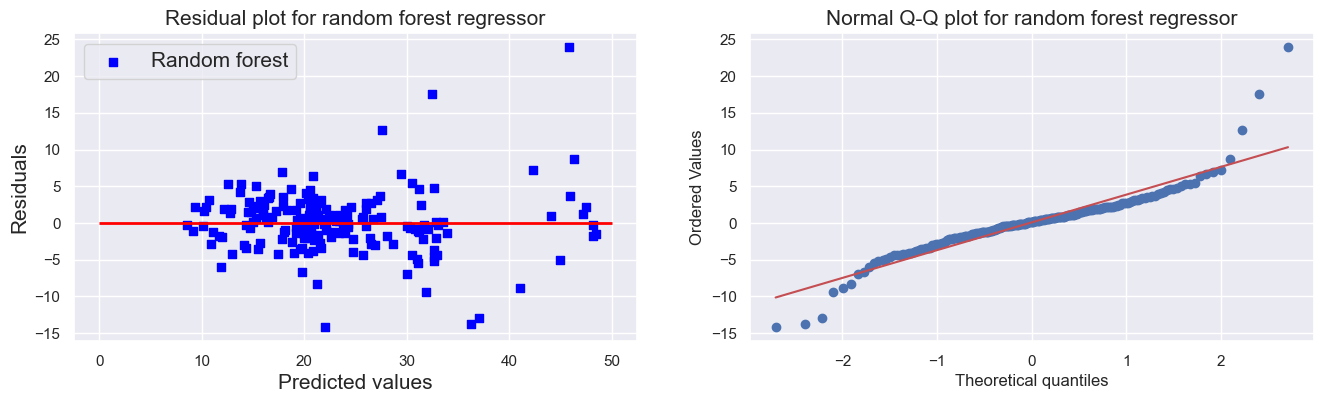

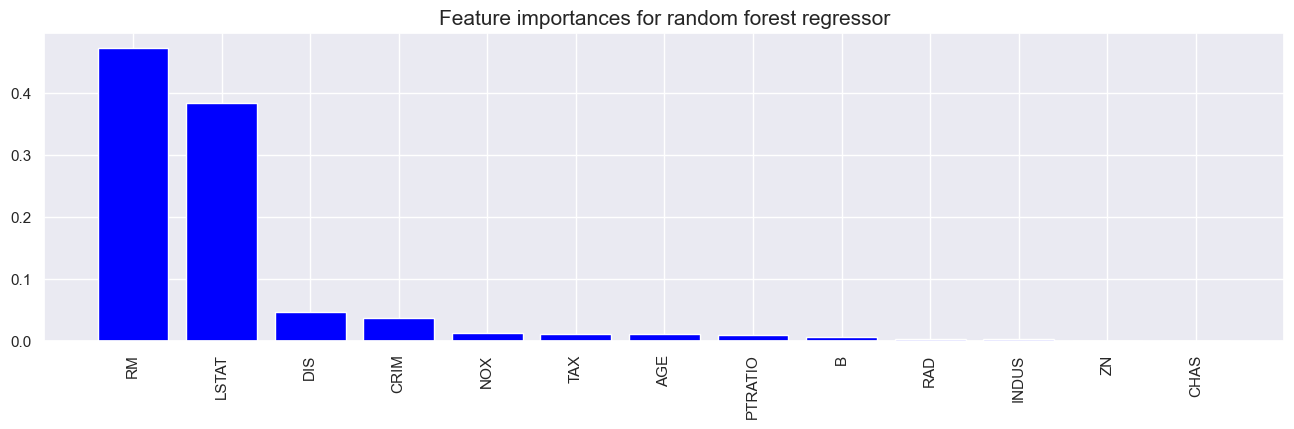

In [46]:
#plot residual plots for both models
fig,ax = plt.subplots(1, 2, figsize=(16, 4))

#plot residual plot for random forest regressor
ax[0].scatter(y_pred, y_pred - y_test, c = "blue", marker = "s", label = "Random forest")
ax[0].set_xlabel("Predicted values", fontsize = 15)
ax[0].set_ylabel("Residuals", fontsize = 15)
ax[0].hlines(y = 0, xmin = 0, xmax = 50, lw = 2, color = "red")
ax[0].set_title("Residual plot for random forest regressor", fontsize = 15)
ax[0].legend(loc = "upper left", fontsize = 15)

#plot the residual qq plot for random forest regressor on the right plot
import scipy.stats as stats
stats.probplot(y_pred - y_test, dist="norm", plot=ax[1])
ax[1].set_title("Normal Q-Q plot for random forest regressor", fontsize = 15)

plt.show()


#plot feature importance for random forest regressor
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16, 4))
plt.title("Feature importances for random forest regressor", fontsize = 15)
plt.bar(range(X_train.shape[1]), importances[indices], color="blue", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



# Conclusion

Ensemble methods are a powerful tool for improving the performance of machine learning models. They can be used to reduce the variance a model, which leads to a more accurate and robust model. Random forests are a specific type of bagging technique that exclusively use decision trees as base models. They are generally more effective than bagging with decision trees due to their ability to reduce both bias and variance in the predictions. 